#**Salary Prediction Analysis**

The purpose of this modeling is to determine the effect of length of work experience and the amount of salary received.
Methods:
*   OLS (statsmodel)
*   Bayesian Regression (sklearn)
*   SVM Regression (sklearn)

Data Definition:


*   No : Number sequence
*   Years Experience: The length of experience in years that a person has acquired in a particular industry sector of employment.
*   Salary: Employee salary given by the company

















##**Importing Packages**

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings

from sklearn.model_selection import train_test_split 
import statsmodels.api as sm 
from sklearn.linear_model import BayesianRidge 
from sklearn.svm import SVR 
from statsmodels.tools.eval_measures import rmse 
from sklearn.metrics import mean_squared_error

##**Load Dataset**

In [22]:
df = pd.read_csv('Salary_dataset.csv')

In [23]:
df.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


##**Data Prepocessing**

###1. **Data Cleansing** 

*   Missing Value
*   Duplicate Value



In [24]:
df.info() #Data Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


**Insight:**
* Data consists of 30 samples with no null column
* YearsExperience & Salary are float



In [25]:
df.duplicated().sum()

0

In [26]:
#Percentage of Missing Values in Each Column
df.isna().sum() * 100 / len(df)

No                 0.0
YearsExperience    0.0
Salary             0.0
dtype: float64

**Observation:**

Based on the results of the calculation of the percentage of the number of missing values ​​obtained a value of 0.0%, so it can be concluded that there is no missing value in the 2 existing columns

###**2. Exploratory Data Analysis**

* Statistical summary of columns
* Univariate analysis

In [27]:
#Statistical Summary of Columns
df.describe()

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


**Observation:**

- Minimum and Maximum value seem reasonable.
- Years Experience and Salary have a mean value greater than 50% compared to the median value (Q2). It can be distributed in the elderly data and the total charge is not normal or not symmetrical.

In [35]:
#Univariate Analysis

##Detect Ouliers via Boxplot
all_columns = df.columns.to_list()
numerical = ['Salary', 'YearsExperience']


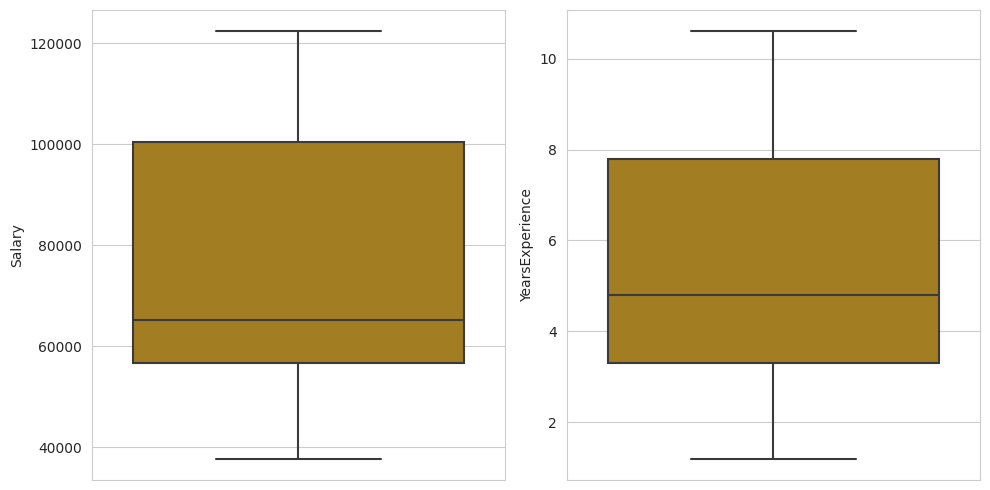

In [36]:
features = numerical
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='darkgoldenrod')
  plt.tight_layout()

<ipython-input-37-1026ed56d3a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='darkgoldenrod')
<ipython-input-37-1026ed56d3a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='darkgoldenrod')


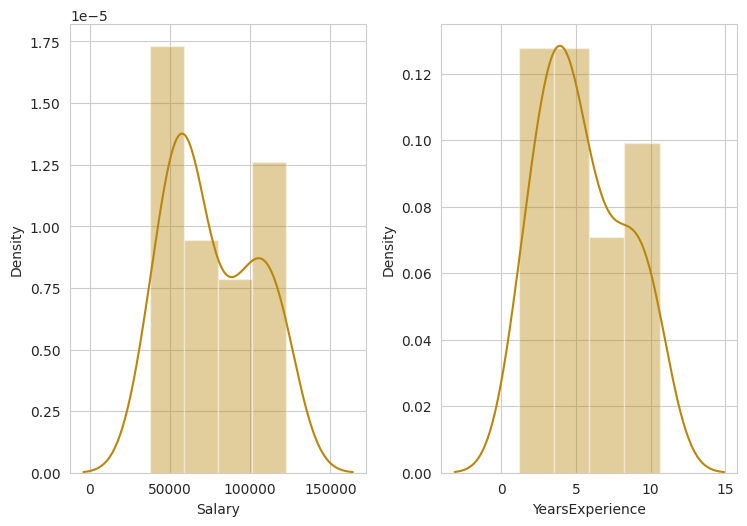

In [37]:
#Inspect Column Distribution
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=df[features[i]], color='darkgoldenrod')
  plt.xlabel(features[i])
  plt.tight_layout()

Observation:
* There are no outliers in the salary dataset
* Data distribution is close to positive skewness






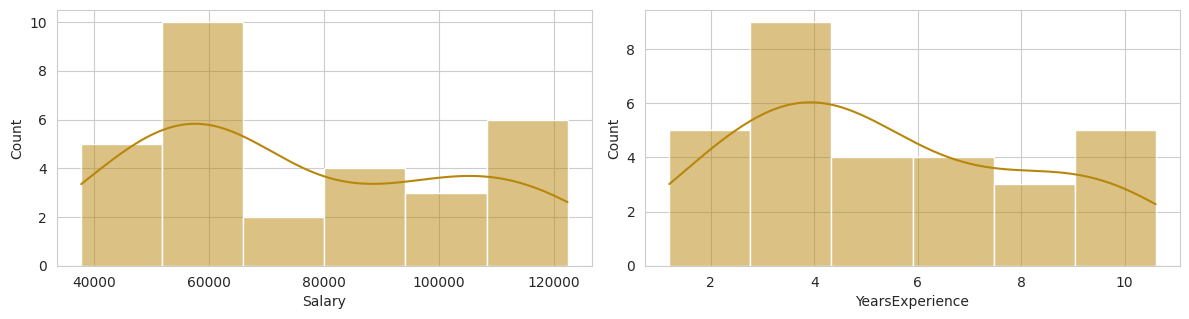

In [38]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='darkgoldenrod', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

**Observation:**

After adjusting/transforming the data, the distribution of thenumerical variables looks closer to normal

In [41]:
# check distribution peak for every column in numerical
for i in df[numerical].columns:
    x = df[numerical][i].mode()
    print(i)
    print(x,'\n')

Salary
0      37732.0
1      39344.0
2      39892.0
3      43526.0
4      46206.0
5      54446.0
6      55795.0
7      56643.0
8      56958.0
9      57082.0
10     57190.0
11     60151.0
12     61112.0
13     63219.0
14     64446.0
15     66030.0
16     67939.0
17     81364.0
18     83089.0
19     91739.0
20     93941.0
21     98274.0
22    101303.0
23    105583.0
24    109432.0
25    112636.0
26    113813.0
27    116970.0
28    121873.0
29    122392.0
Name: Salary, dtype: float64 

YearsExperience
0    3.3
1    4.1
Name: YearsExperience, dtype: float64 



In [43]:
# correlation heatmap df
# Drop field no
df = df.drop(['No'], axis=1)
df.head() 

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


<Axes: >

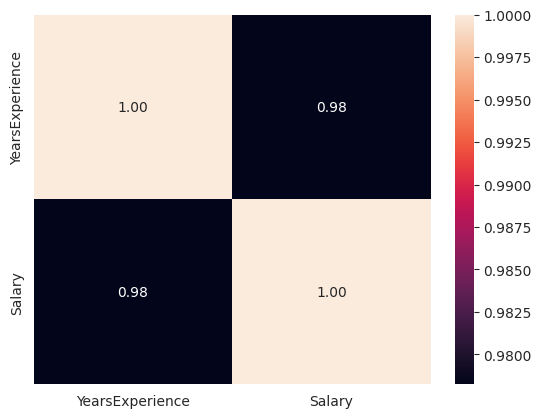

In [44]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Text(0, 0.5, 'Salary')

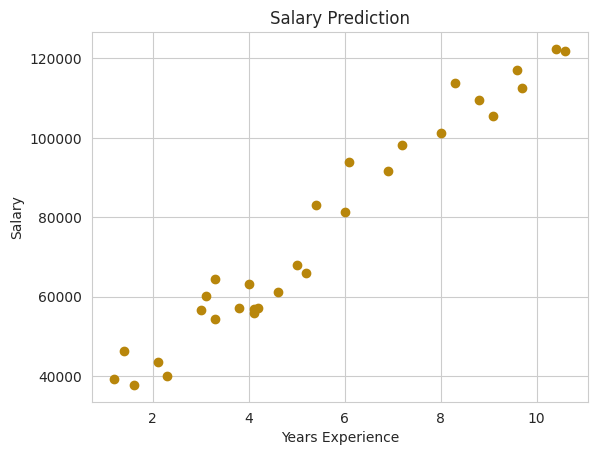

In [48]:
# Correlation in Scatter Plot
plt.show()               
a = plt.scatter(df['YearsExperience'], df['Salary'], color='darkgoldenrod')  
plt.title("Salary Prediction")
plt.xlabel("Years Experience")
plt.ylabel("Salary")

**Observation**
Salary & Years Experiene are highly correlated each other (positive correlation)


##**Machine Learning Models**

Splitting data set as train and test with 20:80 ratio

In [51]:
from imblearn import under_sampling, over_sampling

X = df.drop(['Salary'],axis=1)
y = df['Salary']

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [52]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2,random_state =1)

## **Apply Machine Learning Models**

### **a. Ordinary Least Squared (OLS)**

In [54]:
ols = sm.OLS(x_train, y_train)
results = ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              804.9
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    2.11e-19
Time:                        13:32:09   Log-Likelihood:                         -34.674
No. Observations:                  24   AIC:                                      71.35
Df Residuals:                      23   BIC:                                      72.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
y_pred_ols = results.predict(x_test)

In [56]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  Salary    0.000076
dtype: float64
R2:  0.9722191910934278


Insight:
* R-Squared= 0.972 (97.2%) implies that as much as 97.2% of the length of work variable affects the salary variable, while the rest is influenced by other variables
* Prob of F-statistic = 2.11e-19 indicates that the model fits

## **b. Bayes Ridge Regression**

In [59]:
bayes_model = BayesianRidge()
bayes_model.fit(x_train, y_train)

BayesianRidge()

In [62]:
y_pred_bayes = bayes_model.predict(x_test)

## **c. Support Vector Machine Regressor**

In [63]:
svm_model = SVR(kernel='rbf')
svm_model.fit(x_train, y_train)

SVR()

In [65]:
y_pred_svm = svm_model.predict(x_test)

## **RMSE** 

In [69]:
ols = mean_squared_error(y_test, y_pred_ols, squared=False)
svm = mean_squared_error(y_test, y_pred_svm, squared=False)
bayes = mean_squared_error(y_test, y_pred_bayes, squared=False)

In [70]:
print('Ordinary Least Square RMSE :', ols)
print('Bayes Ridge RMSE :', bayes)
print('SVM Regressor RMSE :', svm)

Ordinary Least Square RMSE : 83200.39529592943
Bayes Ridge RMSE : 7174.207280997589
SVM Regressor RMSE : 24475.350340996287


Based on the RMSE figures it can be seen that the best model that can be used for predictions is Bayes Ridge, with a value of rmse = 7174.207